# Análise exploratória Airbnb no RJ

---






### **1. Entendendo o Negócio:**

Nesta etapa serão estudados os objetivos do negócio, avaliada a situação negócio (quais problemas a serem resolvidos?), bem como determinado as metas e ou objetivos para o projeto de Data Science (quais objetivos e métricas de sucesso?)

**1.1. Objetivos do Negócio.**

O [Airbnb](https://www.airbnb.com.br/) começou em 2008, quando dois designers que tinham um espaço sobrando hospedaram três viajantes que procuravam um lugar para ficar. Agora, milhões de anfitriões e viajantes optam por criar uma conta gratuita no Airbnb para que possam anunciar seu espaço e reservar acomodações únicas em qualquer lugar do mundo. Além disso, os anfitriões de experiências do Airbnb compartilham suas paixões e interesses com viajantes e moradores locais.

Alguns fatos interessantes sobre a empresa, com base em dados de **outubro de 2019** que serão adotados como baseline do projeto:

* Tóquio, Paris e Nova Iorque são as cidades mais populares em experiências de reserva no Airbnb.

* Desde 2017, houve um aumento de 120% no número de anfitriões seniores com mais de 60 anos.

* O ticket médio mundial de reservas por noite é de US$ 80, com média de 3 locais cadastrados por anfitrião.

* Mulheres com mais de 60 anos têm as classificações mais altas como anfitriãs na plataforma.

* 54% dos hóspedes são do gênero feminino.

* 88% das reservas são feitas para grupos de duas a quatro pessoas, e 60% delas ocorrem em casas ou apartamentos inteiros.

* Mais de 120 mil hóspedes já alugaram noites em castelos através da empresa;

* O número projetado de usuários do Airbnb na Europa, até 2020, é de 24 milhões.

* No momento, quase 2 milhões de locais podem ser reservados instantaneamente.

* Mais de U$ 23,5 milhões foram gastos em propaganda somente nos EUA.
São mais de 191 países registrados na plataforma.

* A cidade brasileira cuja procura mais cresceu foi a praia de Matinhos, no Paraná.

* O Brasil é o 13º maior mercado do Airbnb no mundo.

* Representou um impacto de US$ 2,1 bilhões na economia do Brasil em 2018.

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**1.2. Quais os problemas a serem resolvidos?**

No presente projeto busca-se resolver os seguintes problemas identificados pelo contratante do projeto:

* Quais os principais tipos de imóveis locados na cidade do Rio de Janeiro?
* Quais os bairros com maior custo de locação na cidade do Rio de Janeiro?
* Qual o custo médio de locação das unidades na cidade do Rio de Janeiro?
* Qual a quantidade média de diárias por locação na cidade do Rio de Janeiro?
* Qual a disponibidade médias dos imóveis na cidade do Rio de Janeiro?

**1.3. Quais as métricas para aferição do sucesso do projeto de DS?**

* Respostas para as 5 (cinco) situações problemas apresentadas no item A2 considerando os dados disponibilizados pelo contratante, bem como integração com novas bases de dados a serem utilizadas na busca da solução dos problemas.

### **2. Entendendo os Dados:**

Nesta etapa estaremos coletando os dados iniciais, descrevendo os referidos dados, bem como explorando os dados com as estatísticas descritivas e por fim, verificando a qualidade de dados.


##### **2.1.Coletando os dados iniciais**

Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções em Data Science.

Dessa forma, foi selecionado o arquivo (listings.csv) - Summary information and metrics for listings in Rio de Janeiro.

Data do arquivo - **29/12/2022**

- Obs: o Airbnb está sempre atualizando os arquivos, é possível solicitar dados arquivados, mas pode ser necessário que seja realizado um pagamento para liberarem o acesso.

In [ ]:
# Carregando os pacotes do Python necessários à execução do Projeto de Data Science.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 18
sns.set_context('talk', font_scale=1.2);
from google.colab import files
import io
%matplotlib inline

In [ ]:
# Carregando o dataset com informações da plataforma Airbnb.
df = pd.read_csv('listings_cleaned.csv')

##### **2.2. Descrevendo os dados**

Nessa etapa os dados são descritos com objetivo de conhecermos seu formato, os tipos de variáveis (numéricas ou categóricas), bem como aspectos gerais úteis ao entendimento geral do problema.



In [ ]:
# Conhecendo o formato do dataset.

df.shape

(28301, 16)

Em uma análise inicial percebe-se que o dataset apresenta um total de **28301** linhas, entradas ou observações, bem como um total de **16** colunas, variáveis ou features. Sendo interessante a construção de um dicionário com o significado das variáveis para melhor compreensão do problema geral. Adicionalmente, é bastante interessante verificarmos os tipos das variáveis que integram nosso dataset: inteiras, float, objetos. Tal análise poderá indicar na fase de preparação dos dados a necessidade de transformações para melhor aplicação de técnicas de Data Science.

In [ ]:
# Conhecendo as varíaveis e seus tipos.

display(df.dtypes)

id                                 object
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                           object
longitude                          object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel.
* `name` - nome da propriedade anunciada.
* `host_id` - número de id do proprietário (anfitrião) da propriedade.
* `host_name` - Nome do anfitrião.
* `neighbourhood_group` - esta coluna não contém nenhum valor válido.
* `neighbourhood` - nome do bairro.
* `latitude` - coordenada da latitude da propriedade.
* `longitude` - coordenada da longitude da propriedade.
* `room_type` - informa o tipo de quarto que é oferecido.
* `price` - preço para alugar o imóvel.
* `minimum_nights` - quantidade mínima de noites para reservar.
* `number_of_reviews` - número de reviews que a propriedade possui.
* `last_review` - data do último review.
* `reviews_per_month` - quantidade de reviews por mês.
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião.
* `availability_365` - número de dias de disponibilidade dentro de 365 dias.



E por fim, nesta etapa, é interessante visualizarmos a estrutura do nosso dataset com suas linhas e colunas dispostos em forma tabular (Data Frame) com a possibilidade de identificação prematura de dados faltantes, possíveis valores discrepantes, dentre outras questões. **É o primeiro contato com o dataset!**

In [ ]:
# Comando para visualizarmos as 5 primeiras linhas do Dataset.
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10463735,Sobrado aconchegante e espaçoso,53918534,Quiá,NaN,Laranjeiras,-2.293.555,-4.319.107,Entire home/apt,581,1,2,2018-02-14,0.03,6,181
1,53887789,Quadra da praia,333527901,Lucas,NaN,Copacabana,-2.297.032,-4.318.081,Entire home/apt,898,5,0,NaN,NaN,2,365
2,783493769216852616,"Leme, Brasil",491704706,Felipe,NaN,Leme,-2.296.421,-431.716,Entire home/apt,720,1,0,NaN,NaN,2,362
3,703973293620197060,Suíte com entrada independente em casarão 1,20362236,Júlio Cesar,NaN,Botafogo,-2.295.792.000.774.180,-4.318.222.590.793.450,Private room,599,4,1,2022-09-06,0.26,4,363
4,782895997622988215,Apartamento próximo ao metrô,302417043,Laís,NaN,Laranjeiras,-2.293.196,-4.318.018,Entire home/apt,240,3,0,NaN,NaN,1,160


In [ ]:
# Comando para visualizarmos as 5 últimas linhas do Dataset.
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
28296,689013693819928481,Apartamento no Recreio para o Rock in Rio,472932703,Adriana,NaN,Recreio dos Bandeirantes,-23.018.123.668.654.700,-43.466.737.450.193.000,Entire home/apt,871,3,1,2022-09-10,0.27,1,365
28297,23414904,Nice tranquil apartment in Copacabana,100247568,Cecilia,NaN,Copacabana,-2.296.043,-4.317.409,Entire home/apt,194,2,50,2022-09-05,0.86,1,259
28298,48489080,Praia de Botafogo ao lado do Metrô,172482654,Evilene,NaN,Botafogo,-2.294.558,-4.318.361,Entire home/apt,153,15,18,2022-11-20,0.95,13,58
28299,43109156,Lindo apart. 250 mega internet a 300m Praia Leme,46082356,Patrícia,NaN,Botafogo,-2.295.911,-4.317.838,Entire home/apt,457,10,19,2022-12-03,0.60,4,204
28300,2827790,Com vista para o Pão de Açucar,13922020,Joyce E Sarah,NaN,Centro,-2.291.399,-4.317.573,Private room,200,1,0,NaN,NaN,2,359


##### **2.3.Estatísticas Descritivas**

Agora que já conhecemos a estrutura de nossos dados, passamos para etapa de identificação da qualidade de nossos dados, por meio da aplicação de técnicas de estatística descritiva, com especial atenção para identificação de valores faltantes, presença de outliers, análise de correlações entre as variáveis, dentre outras questões relevantes nesta fase inicial.

In [ ]:
# Cálculo do percentual de dados faltantes no Dataset.

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
last_review                       0.300979
reviews_per_month                 0.300979
name                              0.001025
host_name                         0.000106
id                                0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

**Quanto à questão de dados faltantes, em uma breve verificação podemos identificar que:**

* A coluna **`neighbourhood_group`** possui 100% dos seus valores faltantes.
* As variáveis**`reviews_per_month`** e **`last_review`** possuem valores nulos em mais de 30% das linhas.
* As variáveis **`name`** e **`host_name`** têm aproximadamente 0,1% e 0,01%, respectivamente, dos valores nulos.


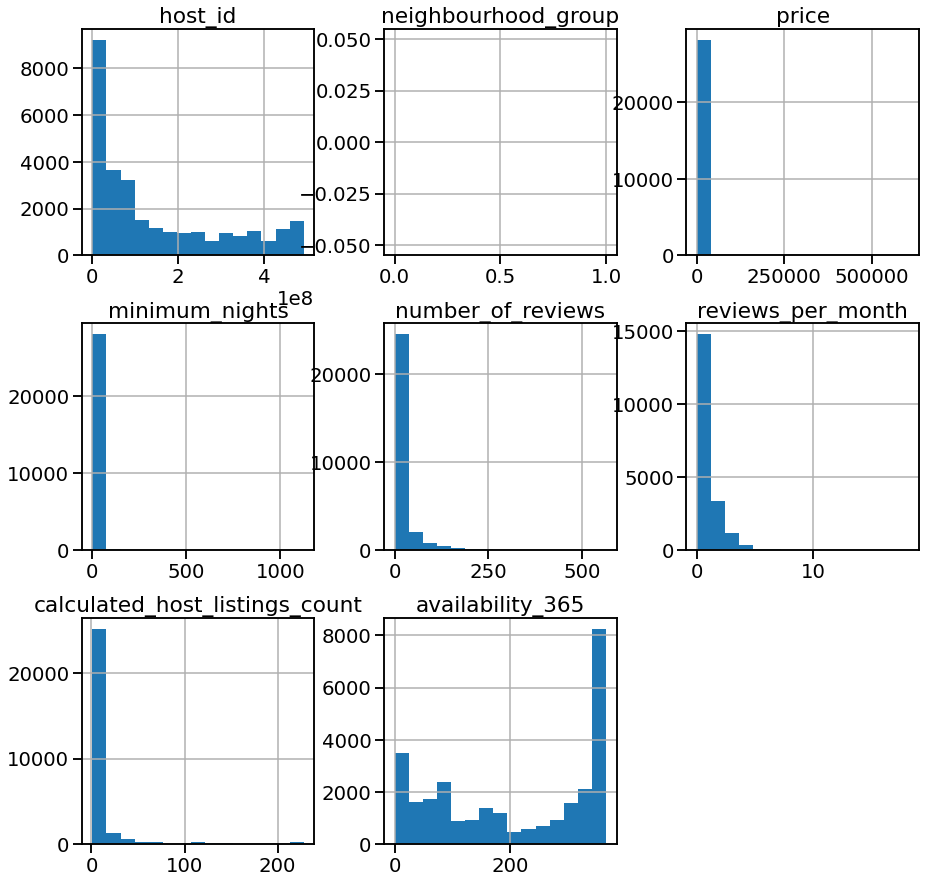

In [ ]:
# Contrução dos histogramas das variáveis do dataset.

df.hist(bins=15, figsize=(15,15));

**Quanto à questão da presença de outliers, em uma rápida análise podemos identificar que:**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Veja por exemplo as variáveis **`price`**, **`minimum_nights`** e **`calculated_host_listings_count`**. Os valores não seguem uma distruição, e distorcem toda a representação gráfica.

Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`

* Plotar `boxplots` para a variável.


In [ ]:
# Construindo os resumos estatísticos das variáveis numéricas usando a função describe.

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,28301.000000,28301.000000,28301.000000,19783.000000,28301.000000,28301.000000
mean,1448.447369,4.904138,17.502420,0.894104,9.448677,207.147168
std,9631.935666,24.675970,37.786946,1.026587,27.668056,136.190680
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,317.000000,1.000000,0.000000,0.190000,1.000000,76.000000
50%,600.000000,2.000000,3.000000,0.540000,2.000000,223.000000
75%,1071.000000,4.000000,16.000000,1.240000,4.000000,350.000000
max,604981.000000,1125.000000,563.000000,18.170000,228.000000,365.000000


**Quanto ao resumo das estatísticas, das variáveis numéricas do dataset, podemos verificar que:**

* A variável **`price`** possui 75% do valor abaixo de 1071, porém seu valor máximo é 604.981.
* A quantidade máxima de noites (**`minimum_nights`**) está acima de 1125 dias no ano.

Ambos os exemplos apontam para presença de outliers.  

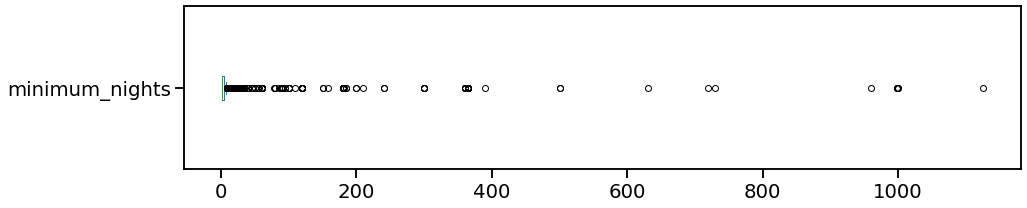

minimum_nights: valores acima de 30:
235 entradas
0.8304%


In [ ]:
# Construção do Boxplot para variável minimum_nights.

df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Verificar a quantidade de valores acima de 30 dias para variável minimum_nights.

print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

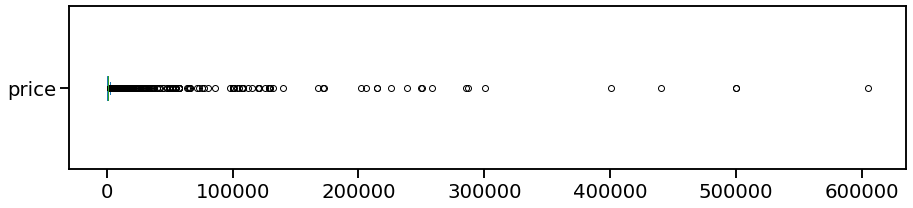


price: valores acima de 1500
4247 entradas
15.0065%


In [ ]:
# Construção do Boxplot para variável price.

df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# Verificar a quantidade de valores acima R$ 1500,00 para variável price.

print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

**Quanto à construção dos Boxplots para verificar a presença de outliers, podemos verificar que:**

* Considerando-se a variável **minimum_nights** que apresenta menos de 1% de valores acima de 30 dias de permanência nos imóveis locados, mas que causa um enorme impacto na média dos valores da variável, sendo forte candidata a ter seus valores transformados na etapa de preparação de dados.

* Já na variável **price** identificamos mais de 15% de valores de imóveis com valores acima de R$ 1500,00 o que pode estar distorcendo a média e mediana da distribuição, constituindo-se em forte candidato a receber tratamento na etapa de preparação dos dados.

### **3. Preparando os Dados:**

Nesta etapa estaremos limpando os dados, integrando os dados, formatando os dados, construindo novos dados, para enfim, selecionar os dados que serão utilizados na construção de nosso modelo (análise exploratória de dados).

##### **3.1.Limpeza dos Dados**

Nesta etapa buscou-se remover os outliers identificados no dataset inicial para se plotar novamente os histogramas, bem como podermos calcular novamente as estatísticas descritivas no novo conjunto de dados.

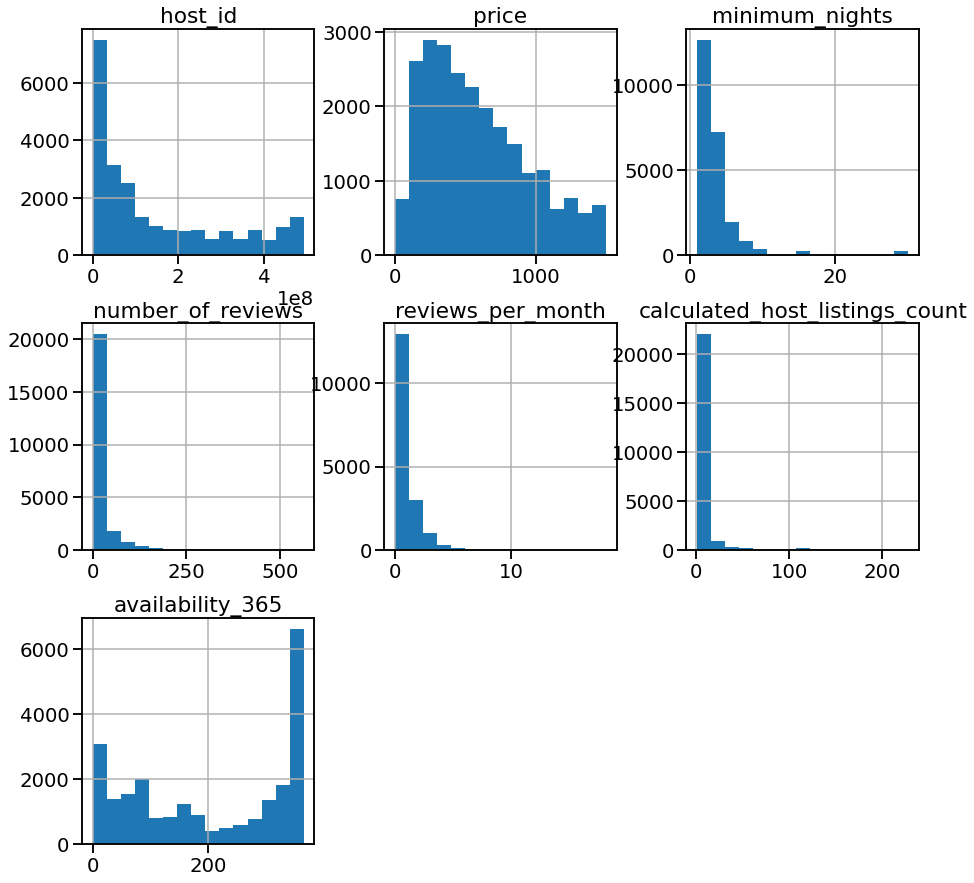

In [ ]:
# Buscou-se remover os outliers na construção de um novo dataset.
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Buscou-se remover a variável `neighbourhood_group`, pois encontra-se vazia.

df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# E na sequência buscou-se plotar novamente o histograma para as variáveis numéricas.

df_clean.hist(bins=15, figsize=(15,15));

**Quanto ao novo conjunto de dados (df_clean), podemos verificar que:**

* Conseguimos identificar uma clara distribuição de valores nos histogramas das variáveis  **minimum_nights** e **price** sem a presença de outliers.

* Buscou-se eliminar a variável numérica **neighbourhood_group** pois a mesma não agregava valor ao conjunto de dados.

##### **3.2.Correlação dos Dados**

Nesta etapa vamos selecionar quais colunas, variáveis ou features serão selecionadas para comporem o nosso modelo de DS considerando suas importâncias no conjunto de dados. Vamos utilizar uma técnica de correlação estatística sobre as variáveis numéricas.

In [ ]:
# Construiu-se uma matriz de correlação entre as variáveis numéricas dataset df_clean.

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.034560,0.000228,0.027493,0.159886,0.030933
minimum_nights,0.034560,1.000000,-0.067094,-0.163837,-0.049962,-0.018122
number_of_reviews,0.000228,-0.067094,1.000000,0.490754,-0.036918,-0.133034
reviews_per_month,0.027493,-0.163837,0.490754,1.000000,0.009244,-0.097998
calculated_host_listings_count,0.159886,-0.049962,-0.036918,0.009244,1.000000,0.015987
availability_365,0.030933,-0.018122,-0.133034,-0.097998,0.015987,1.000000


**Quanto matriz de correlação e o mapa de calor, podemos verificar que:**

* Conseguimos identificar na matriz e mapa de calor as correlação entre as variáveis plotadas duas a duas nos gráficos, ficando claro que o intervalo de análise varia de (-1 a +1) com forte correlação positiva ou negativa entre variáveis para valores próximos de (+1 ou -1), bem como fraca correlação para valores próximos de (0).

* No presente caso identificamos baixa correlação (0) entre as variáveis em análise, com exceção das variáveis numéricas **number_of_reviews** e **reviews_por_month)** que apresentam uma correlação positiva bastante interessante **(0.491)**.

### **4. Construindo o Modelo de DS**:

Nesta etapa serão selecionadas técnicas de modelagem em Data Science, gerando um design de teste, construindo possíveis modelos para DS como modelos de  machine learning, deep learning, inteligência artificial, análise exploratório de dados (tabelas, gráficos, BI), dentre outras técnicas disponíveis, e por fim, o modelo será avaliado quanto à qualidade das suas previsões (métricas de avaliação do modelo).

##### **4.1. Análise Exploratória de Dados - Problemas Investigados no Projeto de DS**

* Quais os principais tipos de imóveis locados na cidade do Rio de Janeiro?
* Quais os bairros com maior custo de locação na cidade do Rio de Janeiro?
* Qual o custo médio de locação das unidades na cidade do Rio de Janeiro?
* Qual a quantidade média de diárias por locação na cidade do Rio de Janeiro?
* Qual a disponibidade médias dos imóveis na cidade do Rio de Janeiro?



**Ranking dos principais tipos de imóveis locados na cidade do Rio de Janeiro?**

In [ ]:
# Identificando a quantidade de imóveis por tipo de imóvel disponível. Foi utilizado o método value_counts().

df_clean.room_type.value_counts()

Entire home/apt    17970
Private room        5411
Shared room          448
Hotel room            45
Name: room_type, dtype: int64

In [ ]:
# Verificando o percentual de cada tipo de imóvel no total do conjunto de dados.

df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.752702
Private room       0.226648
Shared room        0.018765
Hotel room         0.001885
Name: room_type, dtype: float64

**Quanto aos tipos de imóveis mais locados, podemos verificar que:**

* A coluna da variável categórica **room_type** indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de **espaço inteiro**(apartamentos/casas), **quarto inteiro**, **quarto compartilhado** e  **quarto de hotel**.

* Numa simples análise podemos verificar mais de **75%** dos imóveis locados pela AirBnb na cidade do Rio de Janeiro estão na categoria de **espaços inteiros** de casa e ou apartamentos (tenha um lugar só para você).

* Na sequência com mais de **22%** temos os **quartos inteiros** (tenha seu próprio quarto e compartilhe alguns espaços comuns).

* Na categoria de **quartos compartilhados** (fique em um espaço compartilhado, como um quarto comum) temos próximo de **1,8%**.

* E por fim, temos **quarto de hotal** (fique em um quarto inteiro ou compartilhado em um hotel boutique, albergue e outros lugares) com ínfimos **0,1%**.

In [ ]:
# Construindo uma análise de uma varíavel (neighbourhood) em função de outra varíavel (price) usando a função groupby.
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15]

neighbourhood
Caju                        1123.000000
Ricardo de Albuquerque       952.000000
Complexo do Alemão           900.000000
Leblon                       808.280040
Anchieta                     800.000000
Ipanema                      784.733202
Lagoa                        722.697143
Barra da Tijuca              698.632951
São Conrado                  687.444444
Gávea                        666.564935
Alto da Boa Vista            637.500000
Copacabana                   628.655023
Recreio dos Bandeirantes     605.061139
Leme                         601.894737
Jacarepaguá                  585.608960
Name: price, dtype: float64

**Quanto aos bairros com maior custo de locação do imóvel, podemos verificar que:**

* A coluna da variável numérica **price** indica o preço para alugar o imóvel na Airbnb. Dessa forma, combinando os valores da variável **price** com os valores da variável **neighbourhood** podemos encontrar os valores médios por bairro na cidade do Rio de Janeiro com uso da função groupby.

* No output acima, podemos identificar que alguns bairros estão com valores médios destoantes.

* O que nos leva a necessidade **insvestigarmos novamente** nossa base de dados para verificar a representatividade das amostras dos bairros. **O que sinaliza que a metodologia CRISP-DM apesar de dividida em etapas e construída de forma sequêncial, deve ser aplicada de forma iterativa e interativa.** No caso em tela fica claro que teríamos que voltar à fase de **preparação dos dados** para aplicação de técnicas de limpeza e transformação de dados para minimizar as ocorrências identificadas.


**Reanálise dos valores médios de locação de imóvel por bairro considerando o contexto socioeconômico da cidade do Rio de Janeiro.**

In [ ]:
# Verificando a quantidade de imóveis no bairro Caju no contexto de todo dataset.

print(df_clean[df_clean.neighbourhood == "Caju"].shape)

df_clean[df_clean.neighbourhood == "Caju"]

(1, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4281,38109801,You FYI yonder was that good,35690302,JungHo,Caju,-2.289.588,-4.321.316,Entire home/apt,1123,1,0,NaN,NaN,1,365


In [ ]:
# Verificando a quantidade de imóveis no bairro Ricardo de Albuquerque  no contexto de todo dataset.

print(df_clean[df_clean.neighbourhood == "Ricardo de Albuquerque"].shape)

df_clean[df_clean.neighbourhood == "Ricardo de Albuquerque"]

(3, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14464,3106028,Rent home for World Cup season,14962884,Gilcéa,Ricardo de Albuquerque,-2.283.464,-4.338.692,Private room,1000,1,0,NaN,NaN,1,365
19181,14382360,PARQUE OLIMPICO DE DEODORO- FAMILIAR,88303678,Olimpia Catarina De,Ricardo de Albuquerque,-2.284.062,-434.033,Private room,800,1,0,NaN,NaN,1,365
25738,13927176,Rent for the 2016 Olympics,81890830,Luiz,Ricardo de Albuquerque,-2.284.112,-4.340.667,Entire home/apt,1056,1,0,NaN,NaN,1,89


In [ ]:
# Verificando a quantidade de imóveis no bairro Complexo do Alemão  no contexto de todo dataset.

print(df_clean[df_clean.neighbourhood == "Complexo do Alemão"].shape)

df_clean[df_clean.neighbourhood == "Complexo do Alemão"]

(1, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
16700,21448656,Casa 1 quarto alem,155642978,Felipe,Complexo do Alemão,-2.285.998,-4.327.476,Shared room,900,1,1,2017-11-28,0.02,1,365


**Quanto aos bairros com maior custo de locação do imóvel, após a reanálise, podemos verificar que:**

* Os 3 bairros que aparecem no topo do ranking são muito pouco significativos quando considerando-se as quantidades de imóveis locados quando comparando-se ao todo, o que por si só, poderia indicar a necessidade de recálculo ranking, agora não considerando os referidos bairros em função da baixa representatividade.

* O achado reforça a ideia que o cientista de dados precisa ter a sensibilidade e a capacidade de contextualizar os resultados de seus achados dentro do escopo de seu projeto de Data Science.



**Qual o custo médio de locação das unidades na cidade do Rio de Janeiro?**

**Qual a quantidade média de diárias por locação na cidade do Rio de Janeiro?**

**Qual a disponibidade médias dos imóveis na cidade do Rio de Janeiro?**

In [ ]:
# Calculando as estatisticas descritivas do dataset df_clean com a retirada dos outliers.

df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23874.000000,23874.000000,23874.000000,17416.000000,23874.000000,23874.000000
mean,580.872874,3.317793,18.698123,0.913198,6.285541,202.555793
std,362.844904,3.922606,39.263644,1.049854,17.448930,136.303427
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,287.000000,1.000000,0.000000,0.200000,1.000000,72.000000
50%,500.000000,2.000000,4.000000,0.550000,1.000000,204.000000
75%,808.750000,3.000000,18.000000,1.260000,4.000000,347.000000
max,1500.000000,30.000000,563.000000,18.170000,228.000000,365.000000


**Quanto às questões ligadas ao custo médio das locações, quantidade média de diárias, bem como a média de dias de disponibilidade de imóveis, podemos verificar que:**

* O valor médio de uma diária na cidade do Rio de Janeiro fica em torno de **580,87 reais**, com desvio padrão de **362.84**, mediana de **500,00 reais**, com valores máximos chegando a **1.500,00 reais**. Cabendo ressaltar que 75% dos preços estão abaixo do valor de **808,75** reais.

* Já quantidade média de noites fico em torno de **3,31** noites, com desvio padrão de **3,92**, mediana de **2** noites, com valores mínimos de **1** noite e máximo chegando a **30** dias. Sendo importante frisar que 75% das reservas estão abaixo de **3** noites.

* E finalizando a análise podemos constatar que a disponibilidade média dos imóveis na cidade do Rio de Janeiro ficou em torno de **202.55** dias, com desvio padrão de **136.30**, mediana de **204**, valores máximos chegando a 1 ano. Por fim, cabe ressaltar que 75% dos imóveis ficaram disponíveis por **347** dias.









### **5. Avaliando os Resultados do Projeto de DS:**

Nesta etapa, você formaliza sua avaliação sobre se os resultados do projeto atendem ou não os critérios de sucesso dos negócios. E de acordo com os resultados apresentados nas fases anteriores, **fica claro que os 5 objetivos predeterminados na etapa de entendimento do negócio foram plenamente alcançados pela equipe do projeto**. Pode-se considerar que o projeto atendeu ao seu escopo, cronograma e qualidade do produto final entregue ao contratante.

### **6. Conclusões**

O presente projeto tratou de uma análise exploratória de dados (EDA) das operações da AirBnb na cidade do Rio de Janeiro. Os dados analisados foram coletados diretamente no portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).


**Resultados:**

* **75%** dos imóveis locados pela AirBnb na cidade do Rio de Janeiro estão na categoria de **espaços inteiros de casa e ou apartamentos**.

* **O valor médio** de uma diária na cidade do Rio de Janeiro fica em torno de **580,87 reais**, cabendo ressaltar que 75% dos preços estão abaixo do valor de **808,75 reais**.

* Já quantidade média de noites de locação ficou em torno de **3,31 noites**, sendo importante frisar que 75% das reservas estão abaixo de 3 noites.

* E finalizando a análise podemos constatar que a disponibilidade média dos imóveis na cidade do Rio de Janeiro ficou em torno de **202.55 dias**, cabendo ressaltar que 75% dos imóveis ficaram disponíveis por **347** dias.

De uma forma geral, valores bastante consistentes com a **baseline do projeto** estabelecida no item A1.

Por fim, lembra-se que o presente dataset é uma versão resumida, ideal apenas para uma abordagem inicial do problema. Como trabalhos futuros, recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).







### **Referências**

AirBnb. https://www.airbnb.com.br/. Acesso em 23/01/2023.

AirBnb.http://insideairbnb.com/get-the-data.html . Fonte de Dados.Acesso em 23/01/2023.

Melo. Carlos. Curso Sigmoidal: Data Science na Prática 2.0.   2020.

P. Chapman, J. Clinton, R. Kerber, T. Khabaza, T. Reinartz, C. Shearer,
and R. Wirth, “Crisp–dm 1.0 step-by-step data mining guide,” 2000.
